In [41]:
!python -m pip install pip install seaborn
!python -m pip install wordcloud
!python -m pip install reportlab



ERROR: Could not find a version that satisfies the requirement install (from versions: none)
ERROR: No matching distribution found for install
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 4.3 MB/s eta 0:00:00a 0:00:01


In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
from reportlab.lib.pagesizes import letter
from reportlab.pdfgen import canvas
import os

In [33]:
FILE_PATH = "../data/sentiment_analysis.csv"
df = pd.read_csv(FILE_PATH)

In [34]:
df.head()

,Headline,Timestamp,Sentiment
0,permutable ai launch llm driven market themati...,2025-02-27,Neutral
1,digital asset euroclear start first project ph...,2025-02-27,Neutral
2,fusion speciality partner insly accelerate gro...,2025-02-27,Neutral
3,wyzia renews canadian partnership betty,2025-02-27,Neutral
4,hubpay aquanow partner launch uae first fully ...,2025-02-27,Neutral


In [35]:
total_headlines = len(df)
sentiment_counts = df["Sentiment"].value_counts()
sentiment_percentage = (sentiment_counts / total_headlines) * 100
sentiment_percentage = sentiment_percentage.map(lambda x: f"{x:.2f}%") 

print(f"გაანალიზებული სათაურების რაოდენობა: {total_headlines}")
print(f"\nსათაურების სენტიმენტის რაოდენობა:\n{sentiment_counts}")
print(f"\nსათაურების სენტიმენტის პროცენტული რაოდენობა:\n{sentiment_percentage}")

გაანალიზებული სათაურების რაოდენობა: 78

სათაურების სენტიმენტის რაოდენობა:
Sentiment
Neutral     52
Positive    23
Negative     3
Name: count, dtype: int64

სათაურების სენტიმენტის პროცენტული რაოდენობა:
Sentiment
Neutral     66.67%
Positive    29.49%
Negative     3.85%
Name: count, dtype: object


/var/folders/r0/l07vbmj14y5fy33s0964t16c0000gn/T/ipykernel_19686/1176329177.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette=["green", "red", "gray"])


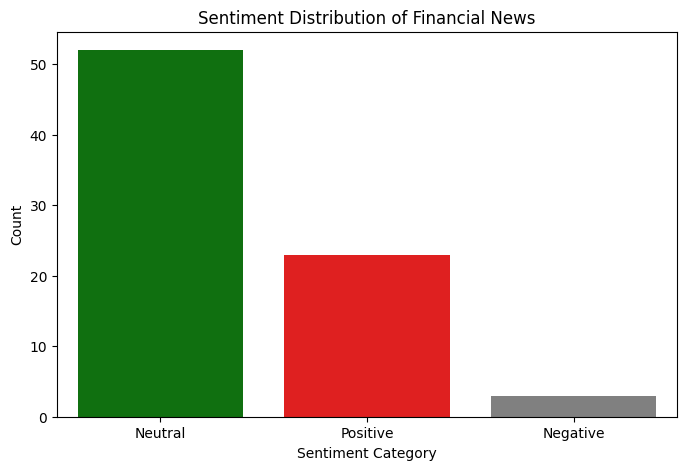

In [36]:
# განწყობების განაწილების გრაფიკი

plt.figure(figsize=(8, 5))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette=["green", "red", "gray"])
plt.xlabel("Sentiment Category")
plt.ylabel("Count")
plt.title("Sentiment Distribution of Financial News")
plt.savefig("../reports/sentiment_distribution.png") 
plt.show()

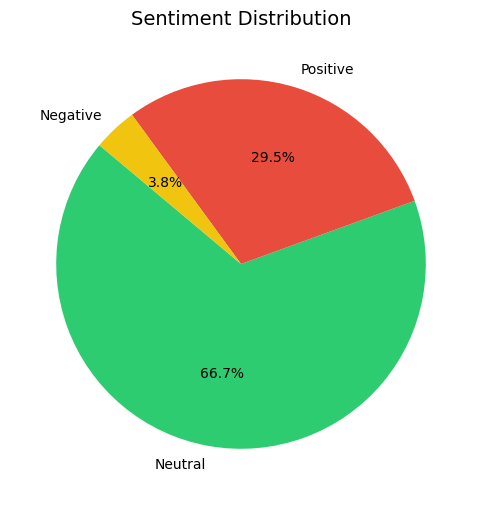

In [38]:
# განაწილების pie chart
sentiment_counts = df["Sentiment"].value_counts()
colors = ["#2ecc71", "#e74c3c", "#f1c40f"] 

plt.figure(figsize=(8, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct="%1.1f%%", colors=colors, startangle=140)
plt.title("Sentiment Distribution", fontsize=14)
plt.savefig("../reports/sentiment_distribution_pie.png")
plt.show()

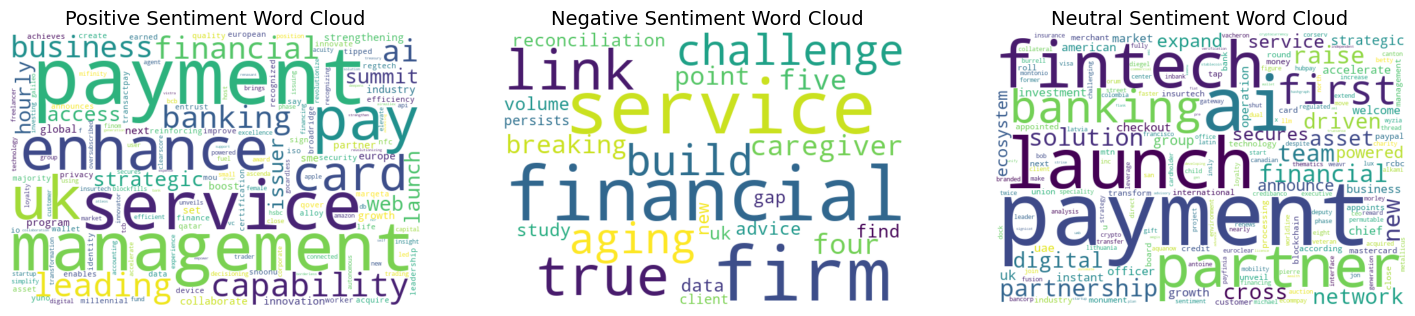

In [37]:
# ყველაზე ხშირად გამოყენბული ისტყვები თითოეული კატეგორიის სტენიმენტში
def generate_word_cloud(sentiment, ax):
    text = " ".join(df[df["Sentiment"] == sentiment]["Headline"])
    wordcloud = WordCloud(width=600, height=400, background_color="white").generate(text)
    
    ax.imshow(wordcloud, interpolation="bilinear")
    ax.set_title(f"{sentiment} Sentiment Word Cloud", fontsize=14)
    ax.axis("off")

fig, axes = plt.subplots(1, 3, figsize=(18, 6))
for i, sentiment in enumerate(["Positive", "Negative", "Neutral"]):
    generate_word_cloud(sentiment, axes[i])
plt.savefig("../reports/sentiment_wordclouds.png")
plt.show()

In [47]:
SENTIMENT_FILE = "../data/sentiment_analysis.csv"
PDF_REPORT_FILE = "../reports/sentiment_report.pdf"

def generate_sentiment_summary(file_path):
    df = pd.read_csv(file_path)
    sentiment_counts = df["Sentiment"].value_counts()
    total_headlines = len(df)
    sentiment_percentage = (sentiment_counts / total_headlines) * 100

    dominant_sentiment = sentiment_counts.idxmax()
    dominant_percentage = sentiment_percentage[dominant_sentiment]

    summary = f"""
    Financial Market Sentiment Analysis 

    Total Analyzed Headlines: {total_headlines}
    Positive: {sentiment_counts.get("Positive", 0)} ({sentiment_percentage.get("Positive", 0):.2f}%)
    Negative: {sentiment_counts.get("Negative", 0)} ({sentiment_percentage.get("Negative", 0):.2f}%)
    Neutral: {sentiment_counts.get("Neutral", 0)} ({sentiment_percentage.get("Neutral", 0):.2f}%)

    Dominant Sentiment: {dominant_sentiment} ({dominant_percentage:.2f}%)

    Trend Analysis: Based on the analyzed headlines, the financial market sentiment is currently **{dominant_sentiment.lower()}**.
    {generate_interpretation(dominant_sentiment, dominant_percentage)}
    """
    
    return summary.strip()

def generate_interpretation(sentiment, percentage):
    if sentiment == "Positive":
        return f"This suggests that there is noticeable optimism in the financial market, with {percentage:.2f}% of headlines reflecting a positive outlook."
    elif sentiment == "Negative":
        return f"This indicates significant concerns or risks, as {percentage:.2f}% of headlines reflect negative sentiment."
    else:
        return f"This suggests the market is mostly stable or uncertain, with {percentage:.2f}% of headlines reflecting neutrality."

def save_report_to_pdf(text, file_path):
    os.makedirs(os.path.dirname(file_path), exist_ok=True)
    c = canvas.Canvas(file_path, pagesize=letter)
    c.setFont("Helvetica", 12)
    lines = text.split("\n")
    
    y_position = 750  
    for line in lines:
        c.drawString(50, y_position, line.strip())
        y_position -= 20 
        if y_position < 50:  
            c.showPage() 
            y_position = 750  

    c.save()
    print(f"Sentiment report successfully saved to: {file_path} ")


if __name__ == "__main__":
    summary_text = generate_sentiment_summary(SENTIMENT_FILE)
    save_report_to_pdf(summary_text, PDF_REPORT_FILE)

Sentiment report successfully saved to: ../reports/sentiment_report.pdf 
